In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     # Data Visualisation
import seaborn as sns
import sklearn

In [72]:
housing = pd.DataFrame(pd.read_csv("../Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [73]:
m = len(housing)
m

545

In [74]:
housing.shape

(545, 13)

In [75]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
           
# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [76]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
df_train.shape

(436, 13)

In [77]:
df_test.shape

(109, 13)

In [78]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
22,8050,3,1,1,1,1,1,0,1,1,0,8645000
41,6360,3,2,4,1,0,0,0,1,0,1,7840000
91,6750,2,1,1,1,1,1,0,0,2,1,6419000
118,6420,3,1,1,1,0,1,0,1,0,1,5950000
472,3630,4,1,2,1,0,0,0,0,3,0,3010000


In [79]:
df_Newtrain.shape

(436, 12)

In [80]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()   # input Normalization
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(10)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
22,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0,0.596970
41,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.527273
91,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0,0.404242
118,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.363636
472,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.109091
344,0.140212,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.181818
1,0.495962,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.909091
257,0.446533,0.4,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.236364
184,0.081036,0.4,0.333333,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.290909
275,0.152882,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.222424


In [81]:
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
df_Newtest.head(20)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
265,0.088172,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.248485
54,0.311828,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0,0.531987
171,0.617849,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0,0.329966
244,0.263082,0.333333,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0,0.262626
268,0.236559,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.246465
231,0.191398,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.276094
25,0.350538,0.666667,0.5,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,1.0,0.646465
169,0.350538,0.666667,0.5,0.333333,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.329966
494,0.369176,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.087542
120,0.350538,0.333333,0.0,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0,0.397306


In [82]:
y_Newtrain = df_Newtrain.pop('price')
X_Newtrain = df_Newtrain

In [83]:
X_Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0
41,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0
91,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0
118,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0
472,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0


In [84]:
y_Newtrain.head()

22     0.596970
41     0.527273
91     0.404242
118    0.363636
472    0.109091
Name: price, dtype: float64

In [85]:
y = y_Newtrain.values
print('y = ', y[: 10])

y =  [0.5969697  0.52727273 0.40424242 0.36363636 0.10909091 0.18181818
 0.90909091 0.23636364 0.29090909 0.22242424]


In [86]:
# the training set

X1 = df_Newtrain.values[:, 0]                
X2 = df_Newtrain.values[:, 1]               
X3 = df_Newtrain.values[:, 2]               
X4 = df_Newtrain.values[:, 3]                
X5 = df_Newtrain.values[:, 4]              
X6 = df_Newtrain.values[:, 5]      
X7 = df_Newtrain.values[:, 6]     
X8 = df_Newtrain.values[:, 7]      
X9 = df_Newtrain.values[:, 8]      
X10 = df_Newtrain.values[:, 9]     
X11 = df_Newtrain.values[:, 10]     

In [87]:
m = len(X_Newtrain)         # size of training set
X_0 = np.ones((m, 1))       
X_0 [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [88]:
X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
X_4 = X4.reshape(m, 1)
X_5 = X5.reshape(m, 1)
X_6 = X6.reshape(m, 1)
X_7 = X7.reshape(m, 1)
X_8 = X8.reshape(m, 1)
X_9 = X9.reshape(m, 1)
X_10 = X10.reshape(m, 1)
X_11 = X11.reshape(m, 1)

In [89]:
# Stacking from X_0 to X_11 horizotally
# This is the final X Matrix for training

X = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10, X_11))
X [: 5]

array([[1.        , 0.4326093 , 0.4       , 0.        , 0.        ,
        1.        , 1.        , 1.        , 0.        , 1.        ,
        0.33333333, 0.        ],
       [1.        , 0.31495405, 0.4       , 0.33333333, 1.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        ],
       [1.        , 0.34210526, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 1.        , 0.        , 0.        ,
        0.66666667, 1.        ],
       [1.        , 0.31913116, 0.4       , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 1.        ],
       [1.        , 0.12489557, 0.6       , 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ]])

In [90]:
theta = np.zeros(12)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [91]:
y_Newtest = df_Newtest.pop('price')
X_Newtest = df_Newtest

In [92]:
X_Newtest.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,0.088172,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0
54,0.311828,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0
171,0.617849,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0
244,0.263082,0.333333,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0
268,0.236559,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0


In [93]:
y_Newtest.head()

265    0.248485
54     0.531987
171    0.329966
244    0.262626
268    0.246465
Name: price, dtype: float64

In [94]:
y_test = y_Newtest.values
print('y_test = ', y_test[: 10])

y_test =  [0.24848485 0.53198653 0.32996633 0.26262626 0.24646465 0.27609428
 0.64646465 0.32996633 0.08754209 0.3973064 ]


In [95]:
# validarion set
X1_test = df_Newtest.values[:, 0]                 
X2_test = df_Newtest.values[:, 1]                
X3_test = df_Newtest.values[:, 2]              
X4_test = df_Newtest.values[:, 3]               
X5_test = df_Newtest.values[:, 4]     
X6_test = df_Newtest.values[:, 5]               
X7_test = df_Newtest.values[:, 6]            
X8_test = df_Newtest.values[:, 7]               
X9_test = df_Newtest.values[:, 8]                
X10_test = df_Newtest.values[:, 9]   
X11_test = df_Newtest.values[:, 10]  

In [96]:
m_test = len(X_Newtest)             # size of validation set
X_0_test = np.ones((m_test, 1))    
X_0_test [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [97]:
X_1_test = X1_test.reshape(m_test, 1)
X_2_test = X2_test.reshape(m_test, 1)
X_3_test = X3_test.reshape(m_test, 1)
X_4_test = X4_test.reshape(m_test, 1)
X_5_test = X5_test.reshape(m_test, 1)
X_6_test = X6_test.reshape(m_test, 1)
X_7_test = X7_test.reshape(m_test, 1)
X_8_test = X8_test.reshape(m_test, 1)
X_9_test = X9_test.reshape(m_test, 1)
X_10_test = X10_test.reshape(m_test, 1)
X_11_test = X11_test.reshape(m_test, 1)

In [98]:
# Stacking X_0_test through X_11_test horizotally
# This is the final X Matrix for validation

X_test = np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test, X_6_test, X_7_test, X_8_test, X_9_test, X_10_test, X_11_test))
X_test [: 5]

array([[1.        , 0.08817204, 0.33333333, 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ],
       [1.        , 0.31182796, 0.33333333, 0.5       , 0.33333333,
        1.        , 1.        , 0.        , 0.        , 1.        ,
        0.33333333, 0.        ],
       [1.        , 0.61784946, 0.33333333, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 1.        ],
       [1.        , 0.26308244, 0.33333333, 0.        , 0.33333333,
        1.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 1.        ],
       [1.        , 0.23655914, 0.66666667, 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ]])

In [99]:
# defining function for computing the cost for linear regression

def compute_cost(X, y, theta, m, Lambda):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    sqrTheta = np.square(theta)
    sqrTheta_new = np.delete(sqrTheta, 0)                                 
    J = 1 / (2 * m) * (np.sum(sqrErrors) + Lambda * np.sum(sqrTheta_new)) 
    return J

In [100]:
def compute_cost_test(X_test, y_test, theta, m_test):
    predictions = X_test.dot(theta)
    errors = np.subtract(predictions, y_test)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m_test) * np.sum(sqrErrors)
    return J

In [101]:
# gradient descent algorithm

def gradient_descent(X, y, theta, alpha, iterations, Lambda):
    cost_history = np.zeros(iterations)
    cost_test = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = np.array(theta)*(parameter_penalty) - sum_delta;                 
        cost_history[i] = compute_cost(X, y, theta, m, Lambda)                   
        cost_test[i] = compute_cost_test(X_test, y_test, theta, m_test)         
    
    return theta, cost_history, cost_test

In [102]:
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 1500;
alpha = 0.1
Lambda = 0.1
p = (1 - (alpha * Lambda) / m)
parameter_penalty = np.full(shape=11, fill_value=p)
parameter_penalty = np.insert(parameter_penalty, 0, 1)

In [103]:
cost = compute_cost(X, y, theta, m, Lambda)
cost

0.04780662856311236

In [104]:
theta, cost_history, cost_test = gradient_descent(X, y, theta, alpha, iterations, Lambda)
print('Final value of theta=', theta)
print('cost_history =', cost_history)
print('cost_test =', cost_test)

Final value of theta= [-0.00035825  0.2863622   0.05427349  0.29015712  0.10703863  0.05507066
  0.03497197  0.02579594  0.0779686   0.07672909  0.07064082  0.05356498]
cost_history = [0.03049271 0.02074584 0.01524538 ... 0.00433395 0.00433394 0.00433392]
cost_test = [0.03494663 0.02434267 0.01820169 ... 0.00584881 0.00584895 0.0058491 ]


Text(0.5, 1.0, 'Convergence of Gradient Descent')

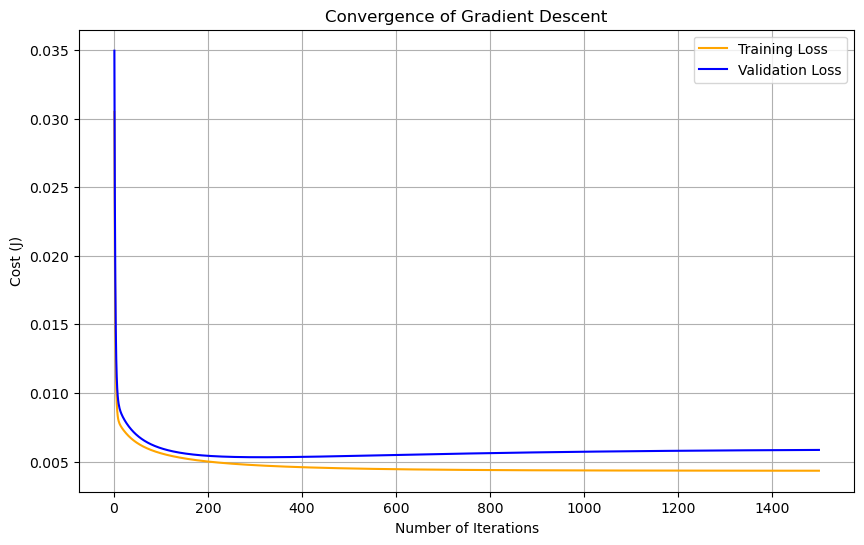

In [105]:
plt.plot(range(1, iterations + 1),cost_history, color='orange', label= 'Training Loss')
plt.plot(range(1, iterations + 1),cost_test, color='blue', label= 'Validation Loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')